<a href="https://colab.research.google.com/github/faizrahman247/Numerical-Programming-in-Python---Web-Scraping/blob/main/Numerical_Programming_in_Python_Web_Scraping_by_Mohd_Faizurrahman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [1]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [2]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

## **Scrapping Movies Data**

In [3]:
# Specifying the URL from which movies related data will be fetched
url='https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
page=requests.get(url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [4]:
# Write Your Code here

# Seting the main website URL
main_website_url = r'https://www.justwatch.com'

# Using list comprehension to create the list of complete movie URLs
list_of_movies_links = [main_website_url + link.get('href') for link in soup.find_all('a', class_="title-list-grid__item--link")]

# Print the list of complete movie URLs
print(list_of_movies_links)


['https://www.justwatch.com/in/movie/dune-2021', 'https://www.justwatch.com/in/movie/animal-2022', 'https://www.justwatch.com/in/movie/salaar', 'https://www.justwatch.com/in/movie/dunki', 'https://www.justwatch.com/in/movie/12th-fail', 'https://www.justwatch.com/in/movie/oppenheimer', 'https://www.justwatch.com/in/movie/the-kerala-story', 'https://www.justwatch.com/in/movie/anyone-but-you', 'https://www.justwatch.com/in/movie/hanu-man', 'https://www.justwatch.com/in/movie/sam-bahadur', 'https://www.justwatch.com/in/movie/captain-miller', 'https://www.justwatch.com/in/movie/ssmb-28', 'https://www.justwatch.com/in/movie/ayalaan', 'https://www.justwatch.com/in/movie/poor-things', 'https://www.justwatch.com/in/movie/eagle-2024', 'https://www.justwatch.com/in/movie/article-370', 'https://www.justwatch.com/in/movie/untitled-shahid-kapoor-kriti-sanon-film', 'https://www.justwatch.com/in/movie/aquaman-and-the-lost-kingdom', 'https://www.justwatch.com/in/movie/fighter-2022', 'https://www.justwa

## **Scrapping Movie Title**

In [5]:
# Write Your Code here
import requests
from bs4 import BeautifulSoup

# Initializing an empty list to store movie titles
list_of_movies_title = []

# Creating a session for making multiple requests
with requests.Session() as session:
    for link in list_of_movies_links:
        try:
            # Sending an HTTP GET request to the URL
            response = session.get(link)
            response.raise_for_status()  # Raise an exception for bad responses

            # Parsing the HTML content using BeautifulSoup with the 'html.parser'
            soup = BeautifulSoup(response.text, 'html.parser')

            # Finding the movie title (assuming it's in an <h1> tag)
            movie_title = soup.find('h1')

            # Checking if the <h1> tag is found
            title_text = movie_title.text.strip() if movie_title else f"Title not found for {link}"
            list_of_movies_title.append(title_text)

        except requests.exceptions.RequestException as e:
            # Handle any exceptions that may occur during the request
            print(f"Error fetching data for {link}: {e}")
            list_of_movies_title.append(f"Error fetching data for {link}")

# Printing the list of extracted movie titles
print(list_of_movies_title)



['Dune  (2021)', 'Animal  (2023)', 'Salaar  (2023)', 'Dunki  (2023)', '12th Fail  (2023)', 'Oppenheimer  (2023)', 'The Kerala Story  (2023)', 'Anyone But You  (2023)', 'Hanu-Man  (2024)', 'Sam Bahadur  (2023)', 'Captain Miller  (2024)', 'Guntur Kaaram  (2024)', 'Ayalaan  (2024)', 'Poor Things  (2023)', 'Eagle  (2024)', 'Article 370  (2024)', 'Teri Baaton Mein Aisa Uljha Jiya  (2024)', 'Aquaman and the Lost Kingdom  (2023)', 'Fighter  (2024)', 'Upgraded  (2024)', 'Bhakshak  (2024)', 'Jawan  (2023)', 'Neru  (2023)', 'The Marvels  (2023)', 'Merry Christmas  (2024)', 'Anatomy of a Fall  (2023)', 'Code 8  (2019)', 'Dune: Part Two  (2024)', 'Manjummel Boys  (2024)', '365 Days  (2020)', 'The Beekeeper  (2024)', 'Sapta Sagaradaache Ello: Side B  (2023)', 'Singapore Saloon  (2024)', 'Migration  (2023)', 'American Fiction  (2023)', 'Sound of Freedom  (2023)', "Harry Potter and the Philosopher's Stone  (2001)", 'Hi Nanna  (2023)', 'Crakk: Jeetega... Toh Jiyegaa  (2024)', 'Bramayugam  (2024)', 'La

## **Scrapping release Year**

In [6]:
# Write Your Code here
import requests
from bs4 import BeautifulSoup

# Creating a session for making multiple requests
with requests.Session() as session:
    # Using list comprehension to fetch and process each link
    list_of_release_years = [
        (
            release_year_tag.text.replace('(', '').replace(')', '').strip()
            if release_year_tag
            else f"Release year not found for {link}"
        )
        for link in list_of_movies_links
        for release_year_tag in [
            BeautifulSoup(session.get(link).text, 'html.parser').find('span', class_="text-muted")
        ]
    ]

# Printing the list of extracted release years without parentheses
print(list_of_release_years)


['2021', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2024', '2023', '2024', '2024', '2024', '2023', '2024', '2024', '2024', '2023', '2024', '2024', '2024', '2023', '2023', '2023', '2024', '2023', '2019', '2024', '2024', '2020', '2024', '2023', '2024', '2023', '2023', '2023', '2001', '2023', '2024', '2024', '2024', '2014', '2023', '2024', '2024', '2024', '2023', '2024', '2024', '2023', '2013', '2024', '2024', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2018', '2023', '2016', '2023', '2024', '2019', '2019', '2023', '2016', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2011', '2024', '2022', '2023', '2023', '2024', '2024', '2023', '2023', '2023', '2018', '2023', '2000', '2017', '2023', '2023', '2023', '2021', '2021', '2018', '2021', '2019', '2023']


## **Scrapping Genres**

In [7]:
# Write Your Code here

# Create a session for making multiple requests
with requests.Session() as session:
    # Use list comprehension to fetch and process each link
    list_of_genres = [
        (
            genres_div.text.strip()
            if genres_div
            else f"Genres not found for {link}"
        )
        for link in list_of_movies_links
        for genres_heading in [
            BeautifulSoup(session.get(link).text, 'html.parser').find('h3', class_="detail-infos__subheading", string="Genres")
        ]
        for genres_div in [genres_heading.find_next('div', class_="detail-infos__value")]
    ]

# Print the list of extracted genres
print(list_of_genres)


['Science-Fiction, Action & Adventure, Drama', 'Drama, Action & Adventure, Crime, Mystery & Thriller', 'Crime, Drama, Mystery & Thriller, Action & Adventure', 'Comedy, Drama', 'Drama, History', 'Drama, History', 'Drama', 'Comedy, Romance', 'Comedy, Fantasy, Action & Adventure', 'Drama, War & Military', 'Action & Adventure, Drama, Mystery & Thriller', 'Drama, Kids & Family, Action & Adventure', 'Action & Adventure, Science-Fiction', 'Comedy, Science-Fiction, Romance, Drama', 'Action & Adventure, Mystery & Thriller', 'Action & Adventure, Drama, Mystery & Thriller', 'Comedy, Drama, Romance, Science-Fiction', 'Fantasy, Action & Adventure, Science-Fiction', 'Mystery & Thriller, War & Military, Action & Adventure', 'Comedy, Romance', 'Drama, Crime', 'Action & Adventure, Mystery & Thriller, Drama', 'Drama, Mystery & Thriller', 'Science-Fiction, Action & Adventure', 'Mystery & Thriller, Drama', 'Crime, Mystery & Thriller, Drama', 'Science-Fiction, Action & Adventure, Crime, Drama, Mystery & Th

## **Scrapping IMBD Rating**

In [8]:
# Write Your Code here

# Initializing an empty list to store ratings
list_of_ratings = []

# Iterate through each movie link in the list
for link in list_of_movies_links:
    try:
        # Sending an HTTP GET request to the URL
        page = requests.get(link)
        page.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup = BeautifulSoup(page.text, 'html.parser')

        # Finding the img tag with alt attribute 'IMDB'
        imdb_img = soup.find('img', alt=re.compile(r'IMDB'))

        if imdb_img:
            # Extract IMDb rating from the following sibling span
            imdb_rating_span = imdb_img.find_next('span')
            imdb_rating = re.search(r'\d+\.\d+', imdb_rating_span.get_text()).group()
            list_of_ratings.append(imdb_rating)
        else:
            list_of_ratings.append("IMDb Rating not found")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {link}: {req_ex}")
        list_of_ratings.append(f"Error fetching {link}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {link}: {ex}")
        list_of_ratings.append(f"Error processing {link}")

# Printing the list of extracted IMDb ratings
print(list_of_ratings)




['8.0', '6.3', '6.5', '6.8', '9.1', '8.4', '7.0', '6.2', '8.4', '7.8', '6.6', '5.4', '6.1', '8.2', '6.9', '8.6', '7.0', '5.6', '6.9', '6.1', '7.2', '7.0', '7.6', 'IMDb Rating not found', '7.6', '7.8', '6.1', '8.9', '8.7', '3.3', '6.4', '8.1', '6.2', '6.7', '7.6', '7.7', '7.6', '8.2', '6.4', '8.4', '8.4', '8.7', '7.9', '8.3', '6.5', '8.0', '7.7', '7.1', '7.6', '6.9', '8.2', '7.0', '5.7', '7.7', '8.0', '7.9', '7.8', '6.8', '8.0', '7.2', '8.2', '8.5', '8.1', '7.4', '4.5', '8.2', '7.6', '7.8', '8.0', '7.6', '7.0', '6.7', '6.4', '7.1', '5.8', '5.8', '6.1', '7.0', '6.3', '8.7', '6.0', '8.1', '5.8', '5.0', '7.1', '7.0', '8.3', '8.2', '5.2', '8.2', '8.0', '6.7', '6.5', '5.6', '7.6', '5.2', '7.6', '8.2', '8.1', '7.6']


## **Scrapping Runtime/Duration**

In [9]:
# Write Your Code here


# Using list comprehension to fetch and process each link
list_of_runtimes = [
    (
        runtime_div.get_text(strip=True) if runtime_heading and runtime_div
        else "Runtime not found"
    )
    for link in list_of_movies_links
    for runtime_heading in [BeautifulSoup(requests.get(link).text, 'html.parser').find('h3', class_='detail-infos__subheading', string='Runtime')]
    for runtime_div in [runtime_heading.find_next('div', class_='detail-infos__value')] if runtime_heading
]

# Printing the list of extracted runtimes
print(list_of_runtimes)


['2h 35min', '3h 24min', '2h 55min', '2h 40min', '2h 27min', '3h 0min', '2h 18min', '1h 43min', '2h 39min', '2h 30min', '2h 37min', '2h 39min', '2h 35min', '2h 22min', '2h 39min', '2h 38min', '2h 21min', '2h 4min', '2h 47min', '1h 45min', '2h 14min', '2h 49min', '2h 30min', '1h 45min', '2h 23min', '2h 32min', '1h 39min', '2h 47min', '2h 15min', '1h 54min', '1h 45min', '2h 28min', '2h 17min', '1h 23min', '1h 57min', '2h 11min', '2h 33min', '2h 35min', '2h 34min', '2h 19min', '2h 2min', '2h 49min', '1h 46min', '2h 36min', '2h 34min', '2h 22min', '3h 26min', '2h 46min', '2h 5min', '1h 54min', '3h 0min', '2h 23min', '1h 41min', '2h 43min', '2h 13min', '2h 7min', '1h 30min', '2h 35min', '2h 2min', '2h 43min', '2h 36min', '2h 8min', '2h 19min', '2h 0min', '2h 30min', '2h 18min', '1h 37min', '2h 24min', '1h 48min', '1h 45min', '1h 52min', '2h 20min', '2h 38min', '1h 57min', '2h 22min', '2h 35min', '2h 52min', '1h 47min', '1h 50min', '2h 46min', '2h 8min', '2h 15min', '1h 47min', '2h 18min', '

## **Scrapping Age Rating**

In [10]:
# Write Your Code here


# Use list comprehension to fetch and process each link
list_of_age_ratings = [
    (
        age_rating_heading.find_next('div', class_='detail-infos__value').get_text(strip=True)
        if age_rating_heading
        else "Age rating not found"
    )
    for link in list_of_movies_links
    for age_rating_heading in [BeautifulSoup(requests.get(link).text, 'html.parser').find('h3', class_='detail-infos__subheading', string='Age rating')]
]

# Print the list of extracted age ratings
print(list_of_age_ratings)


['UA', 'A', 'A', 'Age rating not found', 'Age rating not found', 'UA', 'A', 'Age rating not found', 'UA', 'UA', 'UA', 'UA', 'Age rating not found', 'A', 'UA', 'UA', 'Age rating not found', 'Age rating not found', 'UA', 'Age rating not found', 'A', 'UA', 'UA', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'A', 'Age rating not found', 'UA', 'Age rating not found', 'Age rating not found', 'UA', 'UA', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'U', 'U', 'Age rating not found', 'UA', 'Age rating not found', 'Age rating not found', 'UA', 'U', 'UA', 'Age rating not found', 'A', 'Age rating not found', 'Age rating not found', 'UA', 'A', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'UA', 'UA', 'Age rating not found', 'Age rating not found', 'UA', 'UA', 'Age rating not found', 'A', 'Age rating not found', 'UA', 'UA', 'Age rating not found', 'Age rating not found', 'A', 'UA', 'Age rating not 

## **Fetching Production Countries Details**

In [13]:
# Write Your Code here

# Using list comprehension to fetch and process each link
list_of_production_countries = [
    (
        production_country_heading.find_next('div', class_='detail-infos__value').get_text(strip=True)
        if production_country_heading
        else "Production country not found"
    )
    for link in list_of_movies_links
    for production_country_heading in [BeautifulSoup(requests.get(link).text, 'html.parser').find('h3', class_='detail-infos__subheading', string=re.compile(r'Production\s*country', re.I))]
]

# Printing the list of extracted production countries
print(list_of_production_countries)


['United States', 'India', 'India', 'India', 'India', 'United States, United Kingdom', 'India', 'Australia, United States', 'India', 'India', 'India', 'India', 'India', 'United Kingdom, United States, Ireland', 'India', 'India', 'India', 'United States', 'India', 'United Kingdom, United States', 'India', 'India', 'India', 'United States', 'India', 'France', 'Canada, United Kingdom, United States', 'United States', 'India', 'Poland', 'United States, United Kingdom', 'India', 'India', 'United States, Canada, France', 'United States', 'United States', 'United Kingdom, United States', 'India', 'India', 'India', 'India', 'United States, United Kingdom', 'South Korea, United States', 'India', 'India', 'India', 'United States', 'India', 'India', 'United States, United Kingdom', 'United States', 'India', 'Canada, United States', 'United States', 'United States', 'India', 'India', 'India', 'India', 'India', 'India', 'India', 'United States, Australia, China, United Kingdom', 'Canada', 'India', 

## **Fetching Streaming Service Details**

In [11]:
# Write Your Code here

# Use list comprehension to fetch and process each link
list_of_streaming_services = [
    (
        streaming_service_icon['alt']
        if streaming_service_icon
        else "Streaming services not found"
    )
    for link in list_of_movies_links
    for streaming_service_icon in [BeautifulSoup(requests.get(link).text, 'html.parser').find('img', class_='offer__icon')]
]

# Print the list of extracted streaming service information
print(list_of_streaming_services)


['Apple TV', 'Netflix', 'Netflix', 'Netflix', 'Hotstar', 'Apple TV', 'Zee5', 'Apple TV', 'Streaming services not found', 'Zee5', 'Amazon Prime Video', 'Netflix', 'Sun Nxt', 'Apple TV', 'Amazon Prime Video', 'Streaming services not found', 'Bookmyshow', 'Apple TV', 'Streaming services not found', 'Amazon Prime Video', 'Netflix', 'Apple TV', 'Hotstar', 'Apple TV', 'Netflix', 'Streaming services not found', 'Amazon Prime Video', 'Bookmyshow', 'Bookmyshow', 'Netflix', 'Streaming services not found', 'Amazon Prime Video', 'Amazon Prime Video', 'Apple TV', 'Amazon Prime Video', 'Amazon Prime Video', 'Apple TV', 'Netflix', 'Bookmyshow', 'Bookmyshow', 'Bookmyshow', 'Apple TV', 'Lionsgate Play', 'Bookmyshow', 'Hotstar', 'Netflix', 'Apple TV Plus', 'Amazon Prime Video', 'Streaming services not found', 'Apple TV', 'Lionsgate Play', 'Streaming services not found', 'Netflix', 'Apple TV', 'Bookmyshow', 'Hotstar', 'Apple TV', 'Hotstar', 'Amazon Prime Video', 'Netflix', 'Hotstar', 'Amazon Prime Video'

## **Now Creating Movies DataFrame**

In [23]:
# Write Your Code here
import pandas as pd

# Creating a table to store movie data
dic_for_movies_data_frame = {
    "Movie URL's": list_of_movies_links,
    "Movie Title": list_of_movies_title,
    "Release Year": list_of_release_years,
    "Genres": list_of_genres,
    "IMDB Rating": list_of_ratings,
    "Runtime/Duration": list_of_runtimes,
    "Age Rating": list_of_age_ratings,
    "Production Countries": list_of_production_countries,
    "Streaming Service": list_of_streaming_services,

}

# Create a DataFrame from the table
movies_dataframe = pd.DataFrame(dic_for_movies_data_frame)

# Displaying the DataFrame
movies_dataframe

,Movie URL's,Movie Title,Release Year,Genres,IMDB Rating,Runtime/Duration,Age Rating,Production Countries,Streaming Service
0,https://www.justwatch.com/in/movie/dune-2021,Dune (2021),2020,"Science-Fiction, Action & Adventure, Drama",8.0,2h 35min,Age rating not found,India,Apple TV
1,https://www.justwatch.com/in/movie/animal-2022,Animal (2023),2011,"Drama, Action & Adventure, Crime, Mystery & Th...",6.3,3h 24min,U,United States,Netflix
2,https://www.justwatch.com/in/movie/salaar,Salaar (2023),2018,"Crime, Drama, Mystery & Thriller, Action & Adv...",6.5,2h 55min,Age rating not found,India,Netflix
3,https://www.justwatch.com/in/movie/dunki,Dunki (2023),2024,"Comedy, Drama",6.8,2h 40min,Age rating not found,United States,Netflix
4,https://www.justwatch.com/in/movie/12th-fail,12th Fail (2023),2014,"Drama, History",9.1,2h 27min,U,United States,Hotstar
...,...,...,...,...,...,...,...,...,...
95,https://www.justwatch.com/in/movie/dziewczyny-...,Girls to Buy (2021),2017,"Drama, Mystery & Thriller, Crime",5.2,2h 26min,Age rating not found,United States,Apple TV
96,https://www.justwatch.com/in/movie/deadpool-2,Deadpool 2 (2018),2021,"Action & Adventure, Comedy, Science-Fiction",7.6,2h 1min,Age rating not found,India,Apple TV
97,https://www.justwatch.com/in/movie/spider-man-...,Spider-Man: No Way Home (2021),2019,"Science-Fiction, Action & Adventure, Fantasy",8.2,2h 28min,Age rating not found,South Korea,Apple TV
98,https://www.justwatch.com/in/movie/section-375,Section 375 (2019),2023,"Crime, Drama, Mystery & Thriller",8.1,2h 4min,Age rating not found,South Korea,Amazon Prime Video


## **Scraping TV  Show Data**

In [24]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
page=requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [25]:
# Write Your Code here
# URL of the main website
main_website_url = r'https://www.justwatch.com'

# Finding all <a> tags with the specified class for series links
series_links_html = soup.find_all('a', class_="title-list-grid__item--link")

# Using a list comprehension to create the list of complete series URLs
list_of_series_links = [main_website_url + link.get('href') for link in series_links_html]

# Printing the list of complete series URLs
print(list_of_series_links)





['https://www.justwatch.com/in/tv-show/panchayat', 'https://www.justwatch.com/in/tv-show/game-of-thrones', 'https://www.justwatch.com/in/tv-show/mirzapur', 'https://www.justwatch.com/in/tv-show/shogun-2024', 'https://www.justwatch.com/in/tv-show/true-detective', 'https://www.justwatch.com/in/tv-show/avatar-the-last-airbender', 'https://www.justwatch.com/in/tv-show/one-day', 'https://www.justwatch.com/in/tv-show/aarya', 'https://www.justwatch.com/in/tv-show/solo-leveling-2024', 'https://www.justwatch.com/in/tv-show/sunflower-2021', 'https://www.justwatch.com/in/tv-show/halo', 'https://www.justwatch.com/in/tv-show/indian-police-force', 'https://www.justwatch.com/in/tv-show/death-and-other-details', 'https://www.justwatch.com/in/tv-show/young-sheldon', 'https://www.justwatch.com/in/tv-show/poacher', 'https://www.justwatch.com/in/tv-show/mastram', 'https://www.justwatch.com/in/tv-show/farzi', 'https://www.justwatch.com/in/tv-show/the-twelve', 'https://www.justwatch.com/in/tv-show/jujutsu-k

## **Fetching Tv Show Title details**

In [26]:
# Write Your Code here


# Initializing an empty list to store series titles
list_of_series_titles = [
    (
        BeautifulSoup(requests.get(url).text, 'html.parser').find('h1').text.strip()
        if (soup := BeautifulSoup(requests.get(url).text, 'html.parser').find('h1'))
        else f"Title not found for {url}"
    )
    for url in list_of_series_links
]

# Print the list of extracted series titles
print(list_of_series_titles)


['Panchayat  (2020)', 'Game of Thrones  (2011)', 'Mirzapur  (2018)', 'Shōgun  (2024)', 'True Detective  (2014)', 'Avatar: The Last Airbender  (2024)', 'One Day  (2024)', 'Aarya  (2020)', 'Solo Leveling  (2024)', 'Sunflower  (2021)', 'Halo  (2022)', 'Indian Police Force  (2024)', 'Death and Other Details  (2024)', 'Young Sheldon  (2017)', 'Poacher  (2023)', 'Mastram  (2020)', 'Farzi  (2023)', 'The Twelve  (2019)', 'Jujutsu Kaisen  (2020)', 'Yellowstone  (2018)', 'Maharani  (2021)', 'Avatar: The Last Airbender  (2005)', 'Reacher  (2022)', 'Maamla Legal Hai  (2024)', 'Criminal Justice  (2019)', 'Bigg Boss  (2006)', 'Scam 1992  (2020)', 'Loki  (2021)', 'Money Heist  (2017)', 'Aashram  (2020)', 'The Rookie  (2018)', 'Lucifer  (2016)', 'Euphoria  (2019)', 'The Family Man  (2019)', 'Mr. & Mrs. Smith  (2024)', 'Gandii Baat  (2018)', 'Mashle: Magic and Muscles  (2023)', 'Masters of the Air  (2024)', 'Gullak  (2019)', 'Breaking Bad  (2008)', 'House of Ninjas  (2024)', 'The Last of Us  (2023)', '

## **Fetching Release Year**

In [27]:
# Write Your Code here
# Initializing an empty list to store release years
list_of_release_years = [
    (
        soup.find('span', class_="text-muted").text.replace('(', '').replace(')', '').strip()
        if (soup := BeautifulSoup(requests.get(url).text, 'html.parser')).find('span', class_="text-muted")
        else f"Release year not found for {url}"
    )
    for url in list_of_series_links
]

# Print the list of extracted release years without parentheses
print(list_of_release_years)


['2020', '2011', '2018', '2024', '2014', '2024', '2024', '2020', '2024', '2021', '2022', '2024', '2024', '2017', '2023', '2020', '2023', '2019', '2020', '2018', '2021', '2005', '2022', '2024', '2019', '2006', '2020', '2021', '2017', '2020', '2018', '2016', '2019', '2019', '2024', '2018', '2023', '2024', '2019', '2008', '2024', '2023', '2007', '2024', '2022', '2024', '2022', '2019', '2022', '2010', '2014', '2009', '2018', '2021', '2022', '2021', '2002', '2020', '2024', '2023', '2023', '2023', '2023', '2013', '2023', '2018', '2020', '2021', '2023', '2021', '2018', '2024', '2020', '2009', '2019', '2024', '2016', '2010', '2024', '2020', '2014', '2018', '2024', '2023', '2023', '2011', '2019', '2020', '2019', '2015', '2024', '2023', '2014', '2019', '2015', '2017', '2021', '2019', '2023', '2017']


## **Fetching TV Show Genre Details**

In [28]:
# Write Your Code here
# Initializing an empty list to store genres
list_of_genres_series = []

# Iterating through each series link in the list (list_of_series_links)
for series_link in list_of_series_links:
    # Set the current URL
    url_for_series = series_link

    try:
        # Sending an HTTP GET request to the series URL
        page_for_series = requests.get(url_for_series)
        page_for_series.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup_for_series = BeautifulSoup(page_for_series.text, 'html.parser')

        # Find the <h3> tag containing "Genres"
        genres_heading = soup_for_series.find('h3', class_="detail-infos__subheading", string="Genres")

        # Check if the <h3> tag is found
        if genres_heading:
            # Extract the next sibling <div> tag (which contains the genres)
            genres_div = genres_heading.find_next('div', class_="detail-infos__value")
            if genres_div:
                # Extract the text content of the <div> tag and strip extra whitespaces
                genres_text = genres_div.text.strip()
                list_of_genres_series.append(genres_text)
            else:
                list_of_genres_series.append(f"Genres not found for {url_for_series}")
        else:
            list_of_genres_series.append(f"Genres heading not found for {url_for_series}")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {url_for_series}: {req_ex}")
        list_of_genres_series.append(f"Error fetching {url_for_series}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {url_for_series}: {ex}")
        list_of_genres_series.append(f"Error processing {url_for_series}")

# Printing the list of extracted genres
print(list_of_genres_series)



['Comedy, Drama', 'Drama, Action & Adventure, Science-Fiction, Fantasy', 'Crime, Action & Adventure, Drama, Mystery & Thriller', 'Drama, History, War & Military', 'Drama, Mystery & Thriller, Crime', 'Science-Fiction, Action & Adventure, Comedy, Drama, Kids & Family, Fantasy', 'Comedy, Drama, Romance', 'Crime, Drama, Mystery & Thriller, Action & Adventure', 'Animation, Action & Adventure, Fantasy, Science-Fiction', 'Comedy, Crime', 'Action & Adventure, Science-Fiction, Mystery & Thriller, War & Military', 'Action & Adventure, Crime', 'Mystery & Thriller, Drama, Crime', 'Comedy, Kids & Family', 'Crime, Drama', 'Drama, Comedy, Fantasy', 'Crime, Drama, Mystery & Thriller', 'Drama, Mystery & Thriller', 'Animation, Action & Adventure, Fantasy, Mystery & Thriller, Science-Fiction', 'Drama, Western', 'Drama', 'Action & Adventure, Science-Fiction, Kids & Family, Fantasy, Animation', 'Drama, Mystery & Thriller, Action & Adventure, Crime', 'Drama', 'Drama, Crime, Mystery & Thriller', 'Reality TV,

## **Fetching IMDB Rating Details**

In [29]:
# Write Your Code here

# Initializing an empty list to store IMDb ratings
list_of_imdb_ratings = [
    (
        re.search(r'\d+\.\d+', imdb_img.find_next('span').get_text()).group()
        if (imdb_img := soup.find('img', alt=re.compile(r'IMDB'))) else
        "IMDb Rating not found"
    )
    for series_link in list_of_series_links
    if (page_for_series := requests.get(series_link)).ok and
       (soup := BeautifulSoup(page_for_series.text, 'html.parser'))
]

# Printing the list of extracted IMDb ratings
print(list_of_imdb_ratings)


['8.9', '9.2', '8.5', '9.2', '8.9', '7.3', '8.2', '7.9', '8.5', '7.5', '7.2', '5.1', '6.8', '7.6', '7.7', '7.1', '8.4', '7.4', '8.6', '8.7', '7.9', '9.3', '8.1', 'IMDb Rating not found', '8.1', '3.7', '9.3', '8.2', '8.2', '7.4', '8.0', '8.1', '8.3', '8.7', '7.0', '3.4', '7.6', '7.9', '9.1', '9.5', '7.3', '8.7', '8.7', '7.2', '8.6', '6.3', '8.4', '8.7', '8.0', '8.5', '8.9', '8.5', '8.8', '7.8', '6.8', '8.7', '8.4', '6.5', '6.0', '8.1', '8.5', '8.3', '6.1', '8.8', 'IMDb Rating not found', '8.3', '8.5', '8.2', '7.0', '9.1', '8.3', '7.9', '7.5', '7.7', '5.8', '8.4', '8.7', '8.1', '7.8', '6.4', '7.5', '8.9', '7.0', '7.0', '8.1', '8.5', '8.0', 'IMDb Rating not found', '7.8', '9.0', '8.0', '7.7', '8.0', '8.7', '8.7', '8.4', '9.2', '8.3', '8.6', '8.0']


## **Fetching Age Rating Details**

In [30]:
# Write Your Code here
# Initializing an empty list to store age ratings
list_of_age_ratings = []

# Iterate through each series link in the list (list_of_series_links)
for series_link in list_of_series_links:
    try:
        # Sending an HTTP GET request to the series URL
        page_for_series = requests.get(series_link)
        page_for_series.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup_for_series = BeautifulSoup(page_for_series.text, 'html.parser')

        # Find the h3 tag with class 'detail-infos__subheading' and text 'Age rating'
        age_rating_heading = soup_for_series.find('h3', class_='detail-infos__subheading', string='Age rating')

        if age_rating_heading:
            # Extract age rating from the following sibling div
            age_rating = age_rating_heading.find_next('div', class_='detail-infos__value').get_text(strip=True)
            list_of_age_ratings.append(age_rating)
        else:
            list_of_age_ratings.append("Age rating not found")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {series_link}: {req_ex}")
        list_of_age_ratings.append(f"Error fetching {series_link}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {series_link}: {ex}")
        list_of_age_ratings.append(f"Error processing {series_link}")

# Print the list of extracted age ratings
print(list_of_age_ratings)



['Age rating not found', 'U', 'Age rating not found', 'Age rating not found', 'U', 'Age rating not found', 'A', 'Age rating not found', 'Age rating not found', 'A', 'Age rating not found', 'A', 'Age rating not found', 'U', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'UA', 'U', 'A', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'U', 'A', 'Age rating not found', 'Age rating not found', 'A', 'Age rating not found', 'A', 'Age rating not found', 'U', 'Age rating not found', 'A', 'U', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'A', 'Age rating not found', 'A', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'U', 'Age rating not found', 'Age rating not found', 'U', 'Age rating not found', 'Age ratin

## **Fetching Production Country details**

In [31]:
# Write Your Code here

# Initializing an empty list to store production countries
list_of_production_countries = []

for series_link in list_of_series_links:
    try:
        # Sending an HTTP GET request to the series URL
        page_for_series = requests.get(series_link, timeout=10)  # Adjust timeout as needed
        page_for_series.raise_for_status()

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup_for_series = BeautifulSoup(page_for_series.text, 'html.parser')

        # Find the production country directly
        production_country = soup_for_series.find('h3', class_='detail-infos__subheading', string=re.compile(r'production\s*country', re.I))

        if production_country:
            production_country = production_country.find_next('div', class_='detail-infos__value').get_text(strip=True)
            list_of_production_countries.append(production_country)
        else:
            list_of_production_countries.append("Production country not found")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {series_link}: {req_ex}")
        list_of_production_countries.append(f"Error fetching {series_link}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {series_link}: {ex}")
        list_of_production_countries.append(f"Error processing {series_link}")

# Print the list of extracted production countries
print(list_of_production_countries)


['India', 'United States', 'India', 'United States', 'United States', 'United States', 'United Kingdom', 'India', 'Japan, South Korea', 'India', 'United States', 'India', 'United States', 'United States', 'United States, India', 'India', 'India', 'Belgium', 'Japan, United States', 'United States', 'India', 'United States', 'United States', 'India', 'India', 'India', 'India', 'United States', 'Spain', 'India', 'United States', 'United States', 'United States', 'India', 'United States', 'India', 'Japan', 'United States', 'India', 'United States', 'Japan', 'United States', 'Japan', 'South Korea', 'United States', 'India', 'United States', 'Japan', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'India', 'India', 'Japan', 'Mexico', 'Italy', 'India', 'India', 'United States', 'India', 'United Kingdom', 'India', 'India', 'India', 'United States', 'United States', 'India', 'India', 'South Korea', 'Brazil', 'United States', 'India', 'United

## **Fetching Streaming Service details**

In [32]:
# Write Your Code here

# Initializing an empty list to store streaming services
list_of_streaming_services = [
    (
        streaming_service_icon['alt']
        if (streaming_service_icon := soup_for_series.find('img', class_='offer__icon')) else
        "Streaming services not found"
    )
    for series_link in list_of_series_links
    if (page_for_series := requests.get(series_link)).ok and
       (soup_for_series := BeautifulSoup(page_for_series.text, 'html.parser'))
]

# Printing the list of extracted streaming service information
print(list_of_streaming_services)


['Amazon Prime Video', 'Jio Cinema', 'Amazon Prime Video', 'Hotstar', 'Jio Cinema', 'Netflix', 'Netflix', 'Hotstar', 'Crunchyroll', 'VI movies and tv', 'Jio Cinema', 'Amazon Prime Video', 'Hotstar', 'Amazon Prime Video', 'Amazon Prime Video', 'Streaming services not found', 'Amazon Prime Video', 'Netflix', 'Crunchyroll', 'Netflix', 'Sony Liv', 'Streaming services not found', 'Amazon Prime Video', 'Netflix', 'Hotstar', 'Streaming services not found', 'Sony Liv', 'Hotstar', 'Netflix', 'MX Player', 'Streaming services not found', 'Netflix', 'Jio Cinema', 'Amazon Prime Video', 'Amazon Prime Video', 'Alt Balaji', 'Crunchyroll', 'Apple TV Plus', 'Sony Liv', 'Netflix', 'Netflix', 'Jio Cinema', 'Crunchyroll', 'Netflix', 'Hotstar', 'Netflix', 'Jio Cinema', 'Crunchyroll', 'Lionsgate Play', 'Lionsgate Play', 'Streaming services not found', 'Hotstar', 'Jio Cinema', 'Amazon Prime Video', 'Hotstar', 'Sony Liv', 'Netflix', 'Netflix', 'Netflix', 'Hotstar', 'Netflix', 'Netflix', 'Amazon Prime Video', '

## **Fetching Duration Details**

In [33]:
# Write Your Code here
# Initialize an empty list to store runtimes
list_of_runtimes = [
    (
        runtime_div.get_text(strip=True)
        if (runtime_div := (soup_for_series.find('h3', class_='detail-infos__subheading', string='Runtime') or {}).find_next('div', class_='detail-infos__value'))
        else "Runtime not found"
    )
    for series_link in list_of_series_links
    if (page_for_series := requests.get(series_link)).ok and
       (soup_for_series := BeautifulSoup(page_for_series.text, 'html.parser'))
]

# Print the list of extracted runtimes
print(list_of_runtimes)


['33min', '58min', '50min', '57min', '1h 1min', '54min', '29min', '46min', '24min', '37min', '52min', '38min', '45min', '19min', '47min', '28min', '56min', '54min', '23min', '50min', '44min', '24min', '48min', '38min', '50min', '1h 15min', '52min', '49min', '50min', '43min', '43min', '47min', '58min', '45min', '49min', '44min', '23min', '53min', '29min', '47min', '53min', '58min', '24min', '53min', '34min', '46min', '1h 2min', '26min', '58min', '54min', '52min', '21min', '1h 4min', '42min', '45min', '56min', '23min', '34min', '51min', '50min', '59min', '56min', '39min', '58min', '44min', '24min', '47min', '47min', '46min', '21min', '31min', '1h 3min', '49min', '42min', '29min', '50min', '1h 1min', '46min', '25min', '41min', '42min', '31min', '52min', '48min', '29min', '55min', '57min', '1h 12min', '54min', '50min', '36min', '1h 6min', '21min', '1h 1min', '24min', '52min', '44min', '1h 19min', '52min', '43min']


## **Creating TV Show DataFrame**

In [34]:
# Write Your Code here
import pandas as pd

# Creating a table to store series data
dict_for_series_data_frame = {
    "Tv shows Url": list_of_series_links,
    "Tv Show Title": list_of_series_titles,
    "Release Year": list_of_release_years,
    "TV Show Genres": list_of_genres_series,
    "IMDB Rating": list_of_imdb_ratings,
    "Age Rating": list_of_age_ratings,
    "Production Countries": list_of_production_countries,
    "Streaming Service": list_of_streaming_services,
    "Runtime": list_of_runtimes,
}

# Creating a DataFrame from the table
tvshow_dataframe = pd.DataFrame(dict_for_series_data_frame)

# Displaying the DataFrame
tvshow_dataframe

,Tv shows Url,Tv Show Title,Release Year,TV Show Genres,IMDB Rating,Age Rating,Production Countries,Streaming Service,Runtime
0,https://www.justwatch.com/in/tv-show/panchayat,Panchayat (2020),2020,"Comedy, Drama",8.9,Age rating not found,India,Amazon Prime Video,33min
1,https://www.justwatch.com/in/tv-show/game-of-t...,Game of Thrones (2011),2011,"Drama, Action & Adventure, Science-Fiction, Fa...",9.2,U,United States,Jio Cinema,58min
2,https://www.justwatch.com/in/tv-show/mirzapur,Mirzapur (2018),2018,"Crime, Action & Adventure, Drama, Mystery & Th...",8.5,Age rating not found,India,Amazon Prime Video,50min
3,https://www.justwatch.com/in/tv-show/shogun-2024,Shōgun (2024),2024,"Drama, History, War & Military",9.2,Age rating not found,United States,Hotstar,57min
4,https://www.justwatch.com/in/tv-show/true-dete...,True Detective (2014),2014,"Drama, Mystery & Thriller, Crime",8.9,U,United States,Jio Cinema,1h 1min
...,...,...,...,...,...,...,...,...,...
95,https://www.justwatch.com/in/tv-show/feud,FEUD (2017),2017,Drama,8.4,Age rating not found,United States,Hotstar,52min
96,https://www.justwatch.com/in/tv-show/aspirants,Aspirants (2021),2021,Drama,9.2,Age rating not found,India,Amazon Prime Video,44min
97,https://www.justwatch.com/in/tv-show/arthdal-c...,Arthdal Chronicles (2019),2019,"Drama, Action & Adventure, Fantasy, History, R...",8.3,Age rating not found,South Korea,Netflix,1h 19min
98,https://www.justwatch.com/in/tv-show/deaths-game,Death's Game (2023),2023,"Drama, Science-Fiction, Fantasy",8.6,Age rating not found,South Korea,Amazon Prime Video,52min


## **Task 2 :- Data Filtering & Analysis**

In [36]:
# Write Your Code here
from datetime import datetime

# Convertimg 'Release Year' and 'Rating' columns to numeric
movies_dataframe['Release Year'] = pd.to_numeric(movies_dataframe['Release Year'], errors='coerce')
movies_dataframe['IMDB Rating'] = pd.to_numeric(movies_dataframe['IMDB Rating'], errors='coerce')

tvshow_dataframe['Release Year'] = pd.to_numeric(tvshow_dataframe['Release Year'], errors='coerce')
tvshow_dataframe['IMDB Rating'] = pd.to_numeric(tvshow_dataframe['IMDB Rating'], errors='coerce')

# Get the current year
current_year = datetime.now().year

# Filter movies and TV shows released in the last 3 years
recent_movies = movies_dataframe[movies_dataframe['Release Year'] >= current_year - 3]
recent_tvshow = tvshow_dataframe[tvshow_dataframe['Release Year'] >= current_year - 3]

# Filter movies and TV shows with an IMDb rating of 8 or higher
high_rated_movies = movies_dataframe[movies_dataframe['IMDB Rating'] >= 8.0]
high_rated_tvshow = tvshow_dataframe[tvshow_dataframe['IMDB Rating'] >= 8.0]

# Save filtered movies and TV shows in new dataframe variables
filtered_movies = recent_movies[recent_movies['IMDB Rating'] >= 8.0]
filtered_tvshow = recent_tvshow[recent_tvshow['IMDB Rating'] >= 8.0]

# Display the filtered dataframe of movies
filtered_movies



,Movie URL's,Movie Title,Release Year,Genres,IMDB Rating,Runtime/Duration,Age Rating,Production Countries,Streaming Service
5,https://www.justwatch.com/in/movie/oppenheimer,Oppenheimer (2023),2024,"Drama, History",8.4,3h 0min,Age rating not found,United States,Apple TV
8,https://www.justwatch.com/in/movie/hanu-man,Hanu-Man (2024),2024,"Comedy, Fantasy, Action & Adventure",8.4,2h 39min,Age rating not found,"Japan, South Korea",Streaming services not found
27,https://www.justwatch.com/in/movie/dune-part-two,Dune: Part Two (2024),2021,"Science-Fiction, Drama, Action & Adventure",8.9,2h 47min,Age rating not found,United States,Bookmyshow
37,https://www.justwatch.com/in/movie/nani30,Hi Nanna (2023),2024,"Kids & Family, Romance, Drama",8.2,2h 35min,A,United States,Netflix
40,https://www.justwatch.com/in/movie/laapataa-la...,Laapataa Ladies (2024),2024,"Comedy, Drama",8.4,2h 2min,Age rating not found,Japan,Bookmyshow
41,https://www.justwatch.com/in/movie/interstellar,Interstellar (2014),2023,"Action & Adventure, Drama, Science-Fiction",8.7,2h 49min,A,United States,Apple TV
43,https://www.justwatch.com/in/movie/premalu,Premalu (2024),2024,"Romance, Comedy",8.3,2h 36min,Age rating not found,South Korea,Bookmyshow
45,https://www.justwatch.com/in/movie/anweshippin...,Anweshippin Kandethum (2024),2024,"Crime, Drama, Mystery & Thriller",8.0,2h 22min,Age rating not found,India,Netflix
54,https://www.justwatch.com/in/movie/the-holdovers,The Holdovers (2023),2022,"Comedy, Drama",8.0,2h 13min,Age rating not found,India,Bookmyshow
58,https://www.justwatch.com/in/movie/junior-2023,Junior (2023),2024,Action & Adventure,8.0,2h 2min,Age rating not found,Italy,Amazon Prime Video


In [37]:
# Display the filtered dataframe of tv shows
filtered_tvshow

,Tv shows Url,Tv Show Title,Release Year,TV Show Genres,IMDB Rating,Age Rating,Production Countries,Streaming Service,Runtime
3,https://www.justwatch.com/in/tv-show/shogun-2024,Shōgun (2024),2024,"Drama, History, War & Military",9.2,Age rating not found,United States,Hotstar,57min
6,https://www.justwatch.com/in/tv-show/one-day,One Day (2024),2024,"Comedy, Drama, Romance",8.2,A,United Kingdom,Netflix,29min
8,https://www.justwatch.com/in/tv-show/solo-leve...,Solo Leveling (2024),2024,"Animation, Action & Adventure, Fantasy, Scienc...",8.5,Age rating not found,"Japan, South Korea",Crunchyroll,24min
16,https://www.justwatch.com/in/tv-show/farzi,Farzi (2023),2023,"Crime, Drama, Mystery & Thriller",8.4,Age rating not found,India,Amazon Prime Video,56min
22,https://www.justwatch.com/in/tv-show/jack-reacher,Reacher (2022),2022,"Drama, Mystery & Thriller, Action & Adventure,...",8.1,A,United States,Amazon Prime Video,48min
27,https://www.justwatch.com/in/tv-show/loki,Loki (2021),2021,"Action & Adventure, Fantasy, Science-Fiction, ...",8.2,Age rating not found,United States,Hotstar,49min
41,https://www.justwatch.com/in/tv-show/the-last-...,The Last of Us (2023),2023,"Drama, Action & Adventure, Horror, Science-Fic...",8.7,A,United States,Jio Cinema,58min
44,https://www.justwatch.com/in/tv-show/the-bear,The Bear (2022),2022,"Drama, Comedy",8.6,Age rating not found,United States,Hotstar,34min
46,https://www.justwatch.com/in/tv-show/house-of-...,House of the Dragon (2022),2022,"Science-Fiction, Drama, Action & Adventure, Fa...",8.4,A,United States,Jio Cinema,1h 2min
48,https://www.justwatch.com/in/tv-show/tokyo-vice,Tokyo Vice (2022),2022,"Crime, Drama, Mystery & Thriller",8.0,A,United States,Lionsgate Play,58min


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [38]:
# Write Your Code here
import pandas as pd

# Convert 'IMDB Rating' column to numeric, replacing non-numeric values with NaN
movies_dataframe['IMDB Rating'] = pd.to_numeric(movies_dataframe['IMDB Rating'], errors='coerce')
tvshow_dataframe['IMDB Rating'] = pd.to_numeric(tvshow_dataframe['IMDB Rating'], errors='coerce')

# Calculate the mean IMDb rating for movies
mean_imdb_rating_movies = movies_dataframe['IMDB Rating'].mean()

# Calculate the mean IMDb rating for TV shows
mean_imdb_rating_series = tvshow_dataframe['IMDB Rating'].mean()

print(f"Mean IMDB Rating for Movies: {mean_imdb_rating_movies}")
print(f"Mean IMDB Rating for TV Shows: {mean_imdb_rating_series}")

Mean IMDB Rating for Movies: 7.208080808080808
Mean IMDB Rating for TV Shows: 7.9402061855670105


## **Analyzing Top Genres**

In [39]:
# Write Your Code here
# Split the genres string into a list for TV series
tvshow_dataframe['TV Show Genres'] = tvshow_dataframe['TV Show Genres'].apply(lambda x: x.split(', ') if pd.notna(x) else x)
genres_list_series = [genre for genres in tvshow_dataframe['TV Show Genres'].dropna() for genre in genres]
genre_counts_series = pd.Series(genres_list_series).value_counts()

# Split the genres string into a list for movies
movies_dataframe['Genres'] = movies_dataframe['Genres'].str.split(', ')
genres_list_movies = [genre for genres in movies_dataframe['Genres'].dropna() for genre in genres]
genre_counts_movies = pd.Series(genres_list_movies).value_counts()

# Identify the top 5 genres for TV series and movies
top_genres_series = genre_counts_series.head(5)
top_genres_movies = genre_counts_movies.head(5)

print("Top 5 Genres in TV Series:")
print(top_genres_series)

print("\nTop 5 Genres in Movies:")
print(top_genres_movies)




Top 5 Genres in TV Series:
Drama                 80
Action & Adventure    39
Mystery & Thriller    38
Crime                 34
Science-Fiction       31
dtype: int64

Top 5 Genres in Movies:
Drama                 72
Action & Adventure    47
Mystery & Thriller    40
Comedy                29
Crime                 21
dtype: int64


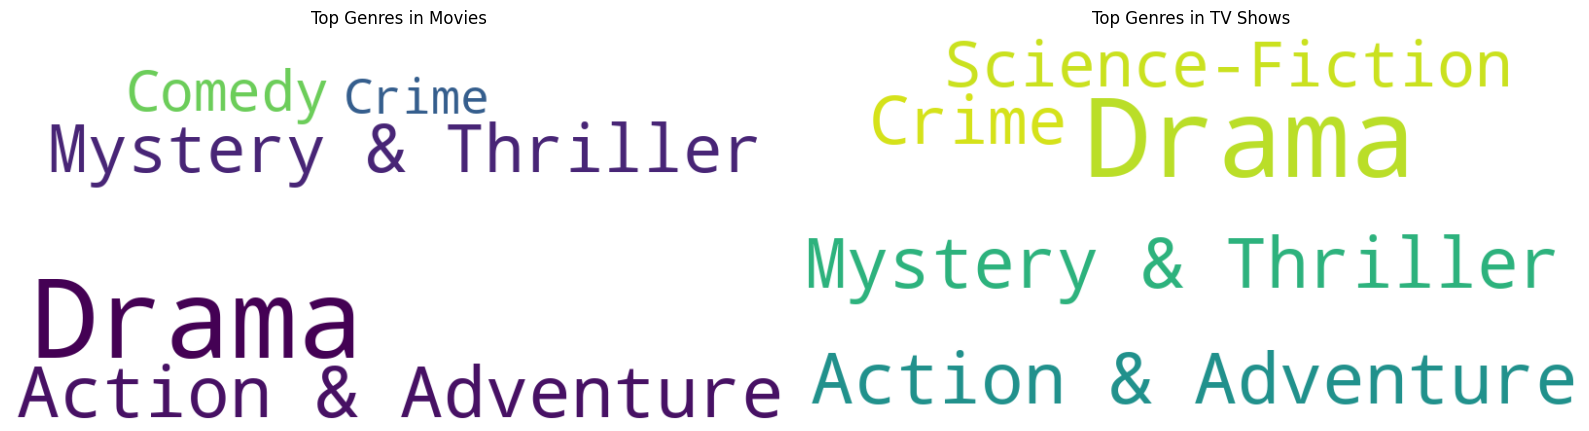

In [44]:
#Let's Visvalize it using word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_and_plot_wordcloud(data, title):
    # Generating a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data)

    # Ploting the word cloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')

# Ploting the word clouds for TV series and movies
plt.figure(figsize=(16, 8))


plt.subplot(1, 2, 1)
generate_and_plot_wordcloud(top_genres_movies, 'Top Genres in Movies')

plt.subplot(1, 2, 2)
generate_and_plot_wordcloud(top_genres_series, 'Top Genres in TV Shows')

plt.tight_layout()  # Improve spacing between subplots
plt.show()



## **Finding Predominant Streaming Service**

In [46]:
# Write Your Code here
import pandas as pd

def count_and_display_top_services(dataframe, media_type):
    # Counting the occurrences of each streaming service
    top_streaming_services = dataframe['Streaming Service'].value_counts().reset_index()
    top_streaming_services.columns = ['Streaming Service', f'Number of {media_type}']

    # Display the top streaming services
    print(f'Top Streaming Services for {media_type}:')
    print(top_streaming_services.head())
    print('\n')



# For movies
count_and_display_top_services(movies_dataframe, 'Movies')

# For TV series
count_and_display_top_services(tvshow_dataframe, 'TV Shows')



Top Streaming Services for Movies:
              Streaming Service  Number of Movies
0                      Apple TV                25
1            Amazon Prime Video                22
2                       Netflix                14
3  Streaming services not found                12
4                    Bookmyshow                 9


Top Streaming Services for TV Shows:
              Streaming Service  Number of TV Shows
0                       Netflix                  31
1            Amazon Prime Video                  17
2                    Jio Cinema                  13
3                       Hotstar                  12
4  Streaming services not found                   7




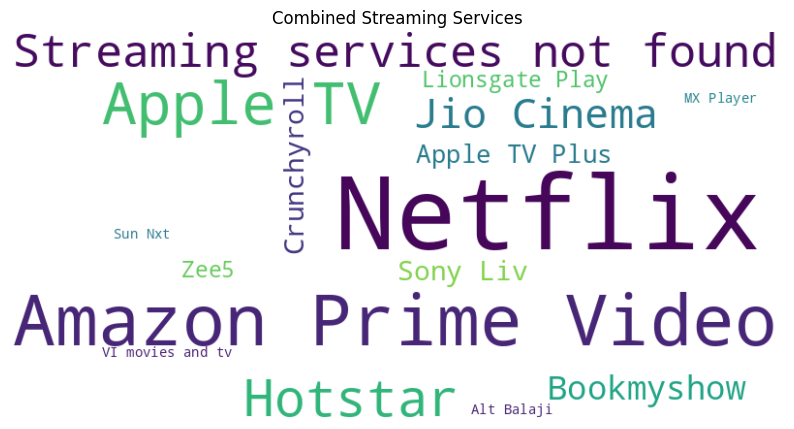

In [47]:
#Let's Visvalize it using word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_and_plot_wordcloud(data, title):
    # Creating a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data)

    # Display the generated word cloud using matplotlib
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Combining the streaming services from movies and TV series dataframes
all_streaming_services = pd.concat([movies_dataframe['Streaming Service'], tvshow_dataframe['Streaming Service']])

# Generating and plot the word cloud
generate_and_plot_wordcloud(all_streaming_services.value_counts(), 'Combined Streaming Services')


## **Task 3 :- Data Export**

In [52]:
#Saving final dataframe as Final Data in csv format
movies_dataframe.to_csv('Final_Data_of_Movies.csv', index=False)
tvshow_dataframe.to_csv('Final_Data_of_TV_Shows.csv', index=False)



from google.colab import files

# Downloading the CSV file for movies
files.download('Final_Data_of_Movies.csv')

# Downloading the CSV file for TV shows
files.download('Final_Data_of_TV_Shows.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
#saving filter data as Filter Data in csv format
filtered_movies.to_csv('Filter_Data_of_Movies.csv', index=False)
filtered_tvshow.to_csv('Filter_Data_of_TV_Shows.csv', index=False)

# Downloading the CSV file for Filter Data of movies
files.download('Filter_Data_of_Movies.csv')

# Downloading the CSV file for Filter Data of TV shows
files.download('Filter_Data_of_TV_Shows.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Dataset Drive Link (View Access with Anyone) -**
https://drive.google.com/drive/folders/17JkdgQ3PZzijQHgyUykVkNfSRp-lE0hy?usp=sharing

# ***Congratulations!!! You have completed your Assignment.***